In [109]:
import random
import timeit
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import scipy.special

In [110]:
def busquedabinaria(x, e):
    if (len(x) == 0):
        return False
    elif (len(x) == 1):
        
        return x[0] == e
    else :
        r1 = x[:len(x)//2]
        r2 = x[len(x)//2:]
            
        if (r1[len(r1) - 1] == e):
            return True
        elif (r1[len(r1) - 1] < e) :
            return busquedabinaria(r2, e)
        else :
            return busquedabinaria(r1, e)

In [111]:
def busquedaternaria(x, e):
    if (len(x) == 0):
        return False
    elif (len(x) == 1):
        return x[0] == e
    else :
        r1 = x[:len(x)//3]
        r2 = x[len(r1): len(r1) * 2]
        r3 = x[len(r1) + len(r2):]
            
        if (r1[len(r1) - 1] == e):
            return True
        elif (r1[len(r1) - 1] > e) :
            return busquedaternaria(r1, e)
        elif (r2[len(r2) - 1] > e) :
            return busquedaternaria(r2, e)
        else :
            return busquedaternaria(r3, e)

In [112]:
def busquedaBinariaALoBruto(x, e) :
        if (len(x) == 0):
            return False
        elif (len(x) == 1):
            return x[0] == e
        else :
            r1 = x[:len(x)//2]
            r2 = x[len(x)//2:]
            return busquedaBinariaALoBruto(r1, e) or busquedaBinariaALoBruto(r2, e)

In [113]:
n_min = 10
n_max = 5000
st = 10
iteraciones = 10 # iteraciones del benchmark

bus_bin_dc = list()
for n in range(n_min, n_max, st):
    suma = 0
    for i in range(1, iteraciones):
        v = range(1, n)
        suma += timeit.timeit(lambda: busquedabinaria(v, 5001), number = 1)
    promedio = suma / iteraciones
    bus_bin_dc.append(promedio)

Text(0, 0.5, 'costo')

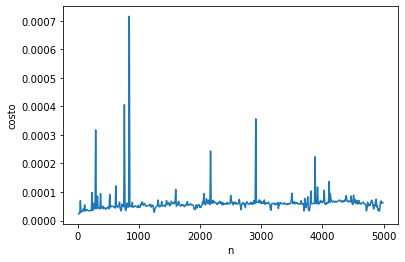

In [114]:
eje_x = list(range(n_min, n_max, st))
plt.plot(eje_x, bus_bin_dc, label = 'BusquedaBinariaDc')
plt.xlabel('n')
plt.ylabel('costo')

In [115]:
n_min = 10
n_max = 5000
st = 10
iteraciones = 10 # iteraciones del benchmark

bus_bin_brut = list()
for n in range(n_min, n_max, st):
    suma = 0
    for i in range(1, iteraciones):
        v = range(1, n)
        suma += timeit.timeit(lambda: busquedaBinariaALoBruto(v, 5001), number = 1)
    promedio = suma / iteraciones
    bus_bin_brut.append(promedio)

Text(0, 0.5, 'costo')

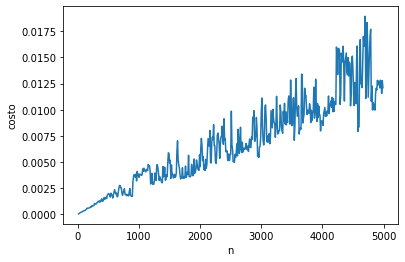

In [116]:
eje_x = list(range(n_min, n_max, st))
plt.plot(eje_x, bus_bin_brut, label = 'BusquedaBinaria')
plt.xlabel('n')
plt.ylabel('costo')

In [119]:
n_min = 10
n_max = 50000
st = 10
iteraciones = 10 # iteraciones del benchmark

bus_ter_dc = list()
for n in range(n_min, n_max, st):
    suma = 0
    for i in range(1, iteraciones):
        v = list(range(1, n))
        suma += timeit.timeit(lambda: busquedaternaria(v, 100001), number = 1)
    promedio = suma / iteraciones
    bus_ter_dc.append(promedio)
    
bus_bin_dc = list()
for n in range(n_min, n_max, st):
    suma = 0
    for i in range(1, iteraciones):
        v = list(range(1, n))
        suma += timeit.timeit(lambda: busquedabinaria(v, 100001), number = 1)
    promedio = suma / iteraciones
    bus_bin_dc.append(promedio)

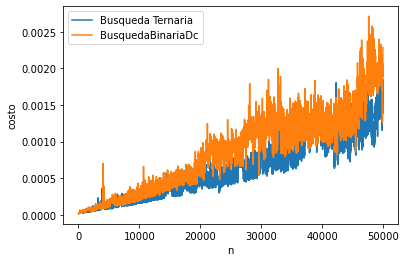

In [120]:
eje_x = list(range(n_min, n_max, st))
plt.plot(eje_x, bus_ter_dc, label = 'Busqueda Ternaria')
plt.xlabel('n')
plt.ylabel('costo')

eje_x = list(range(n_min, n_max, st))
plt.plot(eje_x, bus_bin_dc, label = 'BusquedaBinariaDc')
plt.xlabel('n')
plt.ylabel('costo')
plt.legend()